In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the Data
df = pd.read_csv("health_fitness_dataset.csv")
df = df.drop(columns=["ID"])


In [7]:
# Preprocessing
numeric_features = ["Age", "Height (cm)", "Weight (kg)", "BMI", "Steps per Day",
                    "Hours of Exercise per Week", "Diet Quality Score"]
categorical_features = ["Gender", "Chronic Conditions"]

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first"))
])
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
processed_data = preprocessor.fit_transform(df)
encoded_feature_names = preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(categorical_features)
final_feature_names = numeric_features + list(encoded_feature_names)
processed_df = pd.DataFrame(processed_data, columns=final_feature_names)


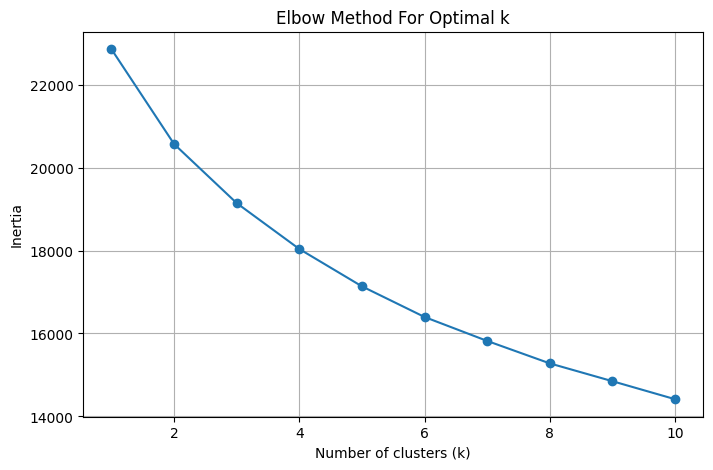

In [8]:
# Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(processed_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [9]:
# K-Means Clustering (k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(processed_df)
processed_df['Cluster'] = clusters

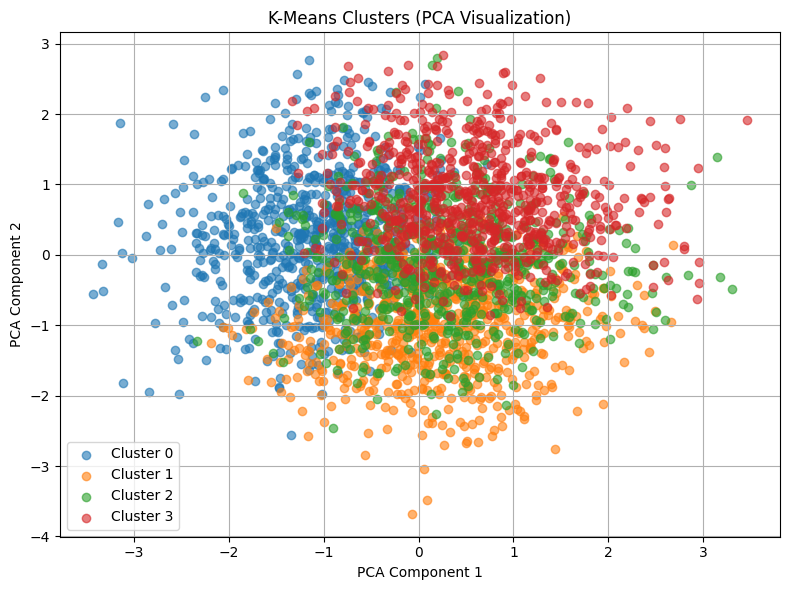

In [10]:
# PCA for Visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(processed_df.drop(columns=["Cluster"]))
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(8, 6))
for cluster_id in sorted(pca_df['Cluster'].unique()):
    subset = pca_df[pca_df['Cluster'] == cluster_id]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster_id}', alpha=0.6)
plt.title('K-Means Clusters (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()